<a href="https://colab.research.google.com/github/ikarosgn/data_viz/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparatiion**

In [2]:
import pandas as pd
import numpy as np

Name		Data Type	Meas.	Description

	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

- ✔️ (1) Set header = None and Set Columns names

In [3]:
col_name = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell',	'Rings']

In [4]:
Abalone = pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง 
print(Abalone.shape)
Abalone.head()

(4177, 9)


,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Get Dummy

In [5]:
Abalone_pre = pd.get_dummies(Abalone, columns=['Sex'])
Abalone_pre

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## (2) Set header = 0 

In [6]:
col_name = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell',	'Rings']

In [7]:
Abalone = pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data', header = 0, names=col_name)   
print(Abalone.shape)
Abalone.head()

(4176, 9)


,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [8]:
from matplotlib import pyplot as plt

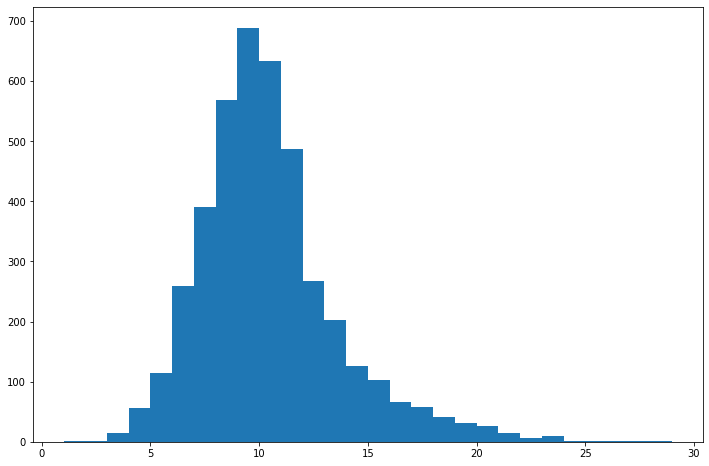

In [9]:
fig = plt.figure(figsize =(12, 8))

plt.hist(Abalone_pre['Rings'], bins=len(set(Abalone_pre['Rings']))); ##Explore ดูว่าอายุกระจายไปในทิศทางไหน

## Create New Class 

- กำหนดให้อายุ เป็น 2 ช่วง คือ
>- (1) <10 (False)
>- (2) >= 10 (True)

In [10]:
Abalone_pre['Age_CLASS'] = Abalone_pre['Rings'] >= 10
Abalone_pre

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,True
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0,True


# **เริ่มทำ Data Mining**

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
TRAIN = Abalone_pre.iloc[:3133,:]
TEST = Abalone_pre.iloc[3133:,:] 
print(f'train = {TRAIN.shape[0]}, test = {TEST.shape[0]}')

train = 3133, test = 1044


In [13]:
TRAIN

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,10,1,0,0,True
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,10,1,0,0,True
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,11,0,0,1,True
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,11,0,0,1,True


In [14]:
TEST

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
3133,0.485,0.390,0.100,0.5565,0.2215,0.1155,0.1850,9,1,0,0,False
3134,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,8,0,0,1,False
3135,0.460,0.350,0.125,0.5165,0.1885,0.1145,0.1850,9,0,0,1,False
3136,0.535,0.420,0.125,0.7640,0.3120,0.1505,0.2650,11,0,0,1,True
3137,0.465,0.360,0.105,0.4880,0.1880,0.0845,0.1900,10,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,True
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0,True


In [15]:
#X_train = Abalone_pre.iloc[:,:8]
X_train = TRAIN.drop(columns=['Age_CLASS', 'Rings'])
X_train

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,1,0,0
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,1,0,0
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,0,0,1
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,0,0,1


In [16]:
#y_train = TRAIN.iloc[:,9:]
y_train = TRAIN['Age_CLASS']
y_train

0        True
1       False
2       False
3        True
4       False
        ...  
3128     True
3129     True
3130     True
3131     True
3132     True
Name: Age_CLASS, Length: 3133, dtype: bool

In [17]:
#X_test = TEST.iloc[:,:8]
X_test = TEST.drop(columns=['Age_CLASS', 'Rings'])
#y_test = TEST.iloc[:,9:]
y_test = TEST['Age_CLASS']

In [18]:
X_test

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
3133,0.485,0.390,0.100,0.5565,0.2215,0.1155,0.1850,1,0,0
3134,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,0,0,1
3135,0.460,0.350,0.125,0.5165,0.1885,0.1145,0.1850,0,0,1
3136,0.535,0.420,0.125,0.7640,0.3120,0.1505,0.2650,0,0,1
3137,0.465,0.360,0.105,0.4880,0.1880,0.0845,0.1900,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [19]:
y_test

3133    False
3134    False
3135    False
3136     True
3137     True
        ...  
4172     True
4173     True
4174    False
4175     True
4176     True
Name: Age_CLASS, Length: 1044, dtype: bool

## 1. Decision Tree (General)

### Import

In [20]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [21]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### Build model (fit)

In [22]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Test

In [24]:
Dtree1.predict(X_test)

array([ True,  True,  True, ...,  True, False,  True])

In [25]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree1.predict(X_test))

0.7097701149425287

`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)`

In [55]:
#inport
from sklearn.tree import DecisionTreeClassifier
#Define  ##ให้ต้นไม้โตได้แค่ 6 ชั้น , max_depth = 6
Dtree2 = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=3, min_samples_leaf=3, min_weight_fraction_leaf=0.1)
#fit 
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.1, random_state=0)

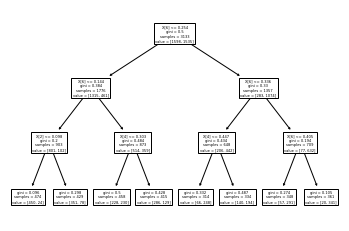

In [56]:
from sklearn import tree

##Explore
tree.plot_tree(Dtree2);

In [57]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree2.predict(X_test))

0.7538314176245211